In [480]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy.stats import binom, poisson, norm, ttest_ind, t, f, f_oneway, chisquare, chi2

sns.set_style("whitegrid")

# Statistics
### Central Limit Theorem
The CLT states that the mean values from a group of samples will be normally distributed about the population mean, even if the population itself is not normally distributed.
- That is 95% of all sample means should fall within 2$\sigma$ of th population mean

### Standard Error
Let's say we have a population of voters it is unrealistic to poll the entire population, so we poll a sample.  We can calculate a statistic from that sample that lets us estimate a parameter of the population.

__example__
Population of 10,000

$N$ = # of population members <br/>
$P$ = population parameter <br/>
$\sigma$ = pop. standard deviation<br/>

$n$ = # sample members<br/>
$\hat{p}$ = sample statistic<br/>
$SE_{\hat{p}}$ = standard error of the sample

Where the population standard deviation describes how wide individual values stray from the population mean, the Standard Error of the Mean describes how far a sample mean may stray from the population mean.

If the population standard deviation $\sigma$ is known, then the sample standard error of the mean can be calculated as:

$$SE_{\bar{x}} = \frac{\sigma}{\sqrt{n}}$$

__Exercise__

- An IQ test is designed to have a mean score of 100 with a standard deviation of 15 points
- If a sample of 10 scores has a mean of 104, can we assume they come from the general population.

- Sample of 10 IQ Test Scores
$$n = 10, \bar{x}=104, \sigma=15$$

$$SE_\bar{x} = \frac{\sigma}{\sqrt{n}} = \frac{15}{10} = 4.743$$

- 68% of 10-item sample means are expected to fall between 95.257 and 104.743 (+- 4.743)

We can say with a 95% confidence level that the population parameter lies within a __confidence interval__ of plus or minus __2__ standard errors of the sample statistic

### Confidence Intervals

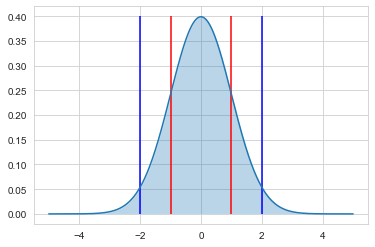

In [35]:
# Confidence Intervals
fig, ax = plt.subplots(figsize=(6,4))

mu = 0
sigma = 1

x = np.linspace(-5, 5, 1000)

y = norm.pdf(x, mu, sigma)

ax.plot(x, y)
ax.fill_between(x,y, alpha=.3)

ax.vlines(mu - (1*sigma), 0,.4, colors='red')
ax.vlines(mu + (1*sigma), 0,.4, colors='red')

ax.vlines(mu - (2*sigma), 0,.4, colors='blue')
ax.vlines(mu + (2*sigma), 0,.4, colors='blue')

plt.show()

## Hypothesis Testing
- Hypothesis testing is the application of statistical methods to real-world questions. 
- We start with an assumption, called the null hypothesis
- We run an experiment to test this null hypothesis
- Based on the results of the experiement we either reject or fail to reject the null hypothesis
- If the null hypothesis is rejected, then we say the data supports another, mutually exclusive alternate hypothesis
- We never prove a hypothesis!

#### Framing the Hypothesis
- At the start of the experiment the null hypothesis is assumed to be true.
- If the data fails to support the null hypothesis, only then can we look to an alternative hypothesis
If testing something assumed to be true, the null hypothesis can reflect the assumption:

_Claim:  "Our product has an average shipping weight of 3.5kg"_

Null hypothesis: average weight = 3.5kg
Alternative Hypothesis is average weight is not 3.5kg

If testing a claim we want to be true, but can't assume, we test it's opposite.

_Claim:  "This prep course improves test scores"_

Null Hypothesis: old scores $\ge$ new scores

Alternate Hypothesis: old scores $\le$ new scores

average shipping weight = 3.5kg $H_0: \mu = 3.5$

average shipping weight not equal 3.5 $H_1: \mu \ne 3.5$



### Testing
Assuming the null hypothesis is valid, if the probability of observing these results in very small then we reject the null hypothesis.  Here 0.05 is our level of significance.

$$\alpha = 0.05$$

- The level of significance $\alpha$ is the area inside the tail(s) of our null hypothesis.
- If $\alpha = 0.05$ and the alterntive hypothesis is less than the null, then the left-tail of our probability curve has an area of 0.05.
- if $\alpha=0.05$ and the alterntive hypothesis is more than the null, then the right-tail of our probability curve has an area of 0.05
- if $\alpha=0.05$ and the alterntive hypothesis is not equal to the null, then the two-tails of our probability curve share an area of 0.05

- These areas establish our critical values or Z-scores.

### Test of Mean vs. Proportion
Two main types of tests.

__Mean__: When we look to find an average or specific value in a population we are dealing with means.<br/>
__Proportion__: Whenever we say something like "35%" or "most" we are dealing with proportions.

When working with means:

$$Z = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$$

assumes we know the population standard deviation - (use T-test when we don't know)

When working with __proportions__:

$$Z = \frac{\hat{p}-p}{\sqrt{\frac{p*q}{n}}} = \frac{\hat{p}-p}{\sqrt{\frac{p*(1-p)}{n}}}$$

In a traditional test:
- take the level of significance $\alpha$
- use it to determine the critical value
- compare the test statistic to the critical value

In a P-value test:
- take the test statistic
- use it to determine the P-value
- compare the P-value to the level of significance $\alpha$

"If the P-value is low the null must go"

reject $H_0$

"If the P-value is high the null must fly"

fail to reject the $H_0$

### Hypothesis Test Examples
#### Example Excercise #1 - Mean

- A company is looking to improve their website performance
- Currently pages have a mean load time of 3.125 seconds, with a standard deviation of 0.700 seconds.

- They hire a consulting firm to improve load times
- Management wants a 99% confidence level
- A sample run of 40 of the new pages has a mean load time of 2.875 seconds


$$\mu = 3.5$$
$$\sigma = 0.700$$
$$\alpha = 0.01$$
$$n=40$$
$$\bar{x} = 2.875$$

- Are these results statistically faster than before?

__Solution: Mean__
1. State the null hypothesis: $H_0: \mu \ge 3.125$
2. State the alternative hypothesis: $H_1: \mu \lt 3.125$
3. Set a level of significance: $\alpha = 0.01$
4. Determine the test type: left-tail or less than

_Traditional Method_

5. Test Statistic:
$$Z=\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}=\frac{2.875-3.125}{0.7\sqrt{40}} = -2.259$$

6. Critical Value<br/>
z-table lookup on 0.01 $z=-2.325$

7. Fail to reject the null hypothesis.<br/>
Since -2.259 > -2.325, the test statistic falls outside the rejection region

So we can't say that the new web pages are statistically faster

```python
stats.norm.ppf(0.01)
-2.32634
```

_P-Value Method_

5. Test Statistic:
$$Z=\frac{\bar{x}-\mu}{\sigma/\sqrt{n}}=\frac{2.875-3.125}{0.7\sqrt{40}} = -2.259$$

6. Critical Value<br/>
z-table lookup on -2.26 $P=0.0119$

7. Fail to reject the null hypothesis.<br/>
Since 0.0119 > 0.01, the test statistic falls outside the rejection region

So we can't say that the new web pages are statistically faster

__Python__
```python
x_bar = 2.875
mu = 3.125
sigma = 0.7
n = 40

mean = (x_bar-mu)/(sigma/np.sqrt(n))
mean
-2.2587697572631282

stats.norm.cdf(-2.26)
0.0119106
```

#### Example Exercise #2 - Proportion

- A video game company surveys 400 of their customers and finds that 58% of the sample are teenagers
- Is it fair to say that most of the company's customers are teenagers?

1. Set the null hypothesis: $H_0: P \le 0.50$
2. Set the alternative hypothesis: $H_1: P\gt 0.50$
3. Calculate the test statistic:<br/>
$$Z = \frac{\hat{p}-p}{\sqrt{\frac{p*q}{n}}}=\frac{0.58-0.50}{\sqrt{\frac{0.50(1-0.50)}{400}}}= \frac{0.08}{0.025}=3.2$$
4. Set a significance level: $\alpha=0.05$
5. Decide what type of tail is involved: right-tailed test (greater than)
6. Look up the critical value: $Z= 1.645$
7. Based on the sample we can reject the null hypothesis and support the claim that most customers are teenagers.
$3.2>1.645$

__Python__
```python
p = 0.5
p_hat = 0.58
n = 400
q = (1-p)

proportion = (p_hat-p)/(np.sqrt((p*q)/n))
3.1999999999999984

stats.norm.ppf(0.95)
1.6448536269514722
```

##### Important
The size of the sample matters!  If we started with a sample size of 40 instead of 400, our test statistic would have been only 1.01, and we would fail to reject the null hypothesis

### Type I and Type II Errors
- Often in medical fields (and other scientific fields) hypothesis testing isused to test against results where the "truth" is already known.
- For example, testing a new diagnostic test for cancer for patients you have already successfully diagnosed by other means
- In this situation you already know if the null hypothesis is True or False
- In these situations where you already know the "truth", then you would know its possible to commit an error with your results.
- This type of analysis is common enough that these errors already have specific names:<br/>
1. Type I Error
2. Type II Error

__Type I Error__: Reject a null hypothesis that should have been supported. i.e. pulling the fire alarm when there is no fire<br/>
__Type II Error__: If we fail to reject a null hypothesis that should have been rejected we've committed a Type II error.

## Student's T Distribution
- Recall that when we used Z scores with a normal distribution, we had to know the population's standard deviation $\sigma$ in order to calculate Z
- But what if in the real world we don't know the population standard deviation?
- Developed by William Gossett while he was working at Guinness Brewery
- Published under the pseudonym "Student" as Guinness wouldn't let him use his name.


- Goal was to select the best barley from small samples, when the population standard deviation was unknown!
- Using a t-table the Student's t-test determines if there is a significant difference between two sets of data
- Due to variance and outliers, it's not enough jut to compare mean values
- A t-test also considers sample variances

#### One-sample t-test
Test the null hypothesis that the population mean is equal to a specified value $\mu$ based on a sample mean $\bar{x}$

__Example__: Want to check if sample of students have the same mean test scores as population of students.

#### Independent Two-sample t-test
Test the null hypothesis that two sample means $\bar{X_1}$ and $\bar{X_2}$ are equal.

__Example__: Want to check if the mean test scores of two separate samples of students have a statistically significant difference.

#### Dependent Two-sample t-test
Used when the samples are dependent:
- one sample has been tested twice (repeated measurements)
- two samples have been matched or paired together

__Example__: Want to check if the same group of students has improved results on test scores before prep course and after prep course

_Note_ how the same sample of students is used thus dependent

- Just like a Z statistic we calculate the t statistic

### Calculate the T-Statistic

Calculate the t-statistic
$$t = \frac{\bar{x}-\mu}{s/\sqrt{n}}$$
$$\bar{x}=sample mean$$
$$\mu = population mean$$
$$s = sample standard error$$
$$n = sample size$$

Main differerence between z and t-statistic is we don't know the population standard deviation so we base it off of $s$ sample standard error instead.

These scores depend on:
- degrees of freedom (based on sample size $n$)
- chosen significance level (default 0.05)

__Compare to a t-score__
$$t \gt\lt t_{n-1}, a$$
$$t=t-statistic$$
$$t_n-1,a=t-critical$$
$$n-1=degrees of freedom$$

#### Independent Two-Sample T-Test
The calculation of the t-statistic differs slightly for the following scenarios:
- equal sample sizes equal variance
- unequal sample sizes, equal variance
- __equal or unequal samples sizes, unequal variance__(most common)

When working with two samples and trying to compare them to each other with a t-test, its often useful to think of the t-test as a ratio of signal(sample means) to noise (sample variability)

__Calculate the t-statistic__
$$t=\frac{signal}{noise}=\frac{difference in means}{sample variabillity}=\frac{\bar{x_1}-\bar{x_1}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

$\bar{x_1},\bar{x_2}$= sample means

$x_1^2, s_2^2$= sample variances

$n_1, n_2$= sample sizes

__Compare to a t-score__

$$t ^\lt_\gt t_{df}, a$$

$t$ = t-statistic

$t_{df},a$ = t-critical

$df$ = degrees of freedom

$\alpha$ = significance level

Since we have two potentially unequal sized samples with different variances, determining the degrees of freedom is a little more complicated.

Welch-Satterthwaite Formula for DF
$$df = \frac{(\frac{s_1^2}{n_1}+\frac{s_1^2}{n_2})^2}{\frac{1}{n_1-1}\frac{s_1^2}{n_1}^2+{\frac{1}{n_2-1}\frac{s_2^2}{n_2}^2}}$$

The general formula:

$$df = n_1 + n_2 - 2$$

t-distributions have fatter tails than normal z-distributions

a generalization is an $n$ = 30 you can consider this a normal distribution

#### Example Student's T-Distribution
- An auto manufacturer has two plants that produce the same car.
- However due to budget constraints they must close one of them.
- The company wants to know if there is a significant difference in production between the two plants

- Daily production over the same 10 days is as follows:

In [70]:
plants = pd.DataFrame({'Plant A':[1184,1203,1219,1238,1243,1204,1269,1256,1156,1248],
                       'Plant B':[1136,1178,1212,1193,1226,1154,1230,1222,1161,1148]})
plants

,Plant A,Plant B
0,1184,1136
1,1203,1178
2,1219,1212
3,1238,1193
4,1243,1226
5,1204,1154
6,1269,1230
7,1256,1222
8,1156,1161
9,1248,1148


__1. First compare the sample means__

$\bar{x}_A$={{plants['Plant A'].mean()}}

$\bar{x}_B$={{plants['Plant B'].mean()}}

$\bar{x}_A-\bar{x}_A$={{plants['Plant A'].mean()}} - {{plants['Plant B'].mean()}} = {{plants['Plant A'].mean()-plants['Plant B'].mean()}}

From this sample, it looks like Plant A produces 36 more cars per day than Plant B

However, the question is.  Is 36 more cars enough to say that the plants are different?

$H_0: X_A \le X_B$

$H_1: X_A \gt X_B$

__one-tailed test__

(10 + 10 - 2) = 18 degrees of freedom

__2. Compute the Variance__

$$s^2=\frac{\sum(x-\bar{x})^2}{n-1}$$

```python
# Caclulate the variance
var_1 = plants.iloc[:,0].var()
1248.0
var_2 = plants.iloc[:,1].var()
1246.0
```

__3. Compute the t-value__

$$=\frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

$$=\frac{36}{\sqrt{\frac{1248}{10}+\frac{1246}{10}}} = \frac{36}{15.792}$$

$$= 2.28$$

```python
# Calculate the t-statistic
ttest = stats.ttest_ind(plants.iloc[:,0],plants.iloc[:,1])
Ttest_indResult(statistic=2.2795770510504845, pvalue=0.03504505626727664)
ttest[0]
2.2795770510504845

# For a two-tailed test
ttest = stats.ttest_ind(plants.iloc[:,0],plants.iloc[:,1])/2
0.017522528133638322

# Look up critical value
a = 0.95
df = 18
stats = t.ppf(a,df)
1.7340636066175354
```

__Compare the statistic__: Since 2.28 $\gt$ 1.734 we reject the null hypothesis.

Therefore, we believe with 95% confidence that Plant A produces more cars per day than Plant B.

## ANOVA
Analysis of Variance.  

What if we had 3 or more samples the experiment would look like this.
$$H_0=\mu_A = \mu_B = \mu_C$$

or we could test each pair

$$H_0: \mu_A = \mu_B, \alpha = 0.05$$
$$H_0: \mu_A = \mu_C, \alpha = 0.05$$
$$H_0: \mu_B = \mu_C, \alpha = 0.05$$

The problem with this would reduce the overall confidence:

0.95 x 0.95 x 0.95 = 0.857

- This is where ANOVA comes in
- We compute an __F Value__, and compare it to a critical value determined by our __degrees of freedom__ (the number of groups, and the number of items in each group)

In [155]:
# prepare some data
data = pd.DataFrame({'Group A':[37,60,52,43,40,52,55,39,39,23],
                     'Group B':[62,27,69,64,43,54,44,31,49,57],
                     'Group C':[50,63,58,54,49,52,53,43,65,43]})
data

,Group A,Group B,Group C
0,37,62,50
1,60,27,63
2,52,69,58
3,43,64,54
4,40,43,49
5,52,54,52
6,55,44,53
7,39,31,43
8,39,49,65
9,23,57,43


##### 1. First calculate the sample means

In [127]:
data.mean()

Group A    44.0
Group B    50.0
Group C    53.0
dtype: float64

##### 2. Next calculate the overall mean

In [132]:
sample_means = data.mean()
mu_tot = sample_means.mean()
mu_tot

49.0

ANOVA considers two types of variance:
- __Between Groups__: how far group means stray from total mean
- __Within Groups__: how far individual values stray form their respective group mean

The F Value we're trying to calculate is simply the ration between these two variances

$$F = \frac{VarianceBetweenGroups}{VarianceWithinGroups}$$

Recall the equation for variance:
$$s^2 = \frac{\sum(x-\bar{x})^2}{n-1}$$

Here $\sum(x-\bar{x})^2$ is the "sum of squares" $SS$

and $n-1$ is the "degrees of freedom" $df$

So the formula for the __F Value__ becomes:

$$F = \frac{VarianceBetweenGroups}{VarianceWithinGroups}=\frac{\frac{SSG}{^{df}groups}}{\frac{SSE}{^{df}error}}$$

$SSG$= Sum of Squares Groups<br/>
$SSE$= Sum of Squares Error<br/>
$^{df}groups$= degrees of freedom (groups)<br/>
$^{df}error$= degrees of freedom (error)<br/>



##### 3. Let's begin calculating

Sum of Squares Groups

$(\mu_A - \mu_TOT)^2=(44-49)^2=25$

In [149]:
ssg_a = (sample_means[0]-mu_tot)**2
ssg_b = (sample_means[1]-mu_tot)**2
ssg_c = (sample_means[2]-mu_tot)**2
print(ssg_a, ssg_b, ssg_c)
ssg_tot = np.sum([ssg_a, ssg_b, ssg_c])
print(f"The SSG Total is {ssg_tot}")

25.0 1.0 16.0
The SSG Total is 42.0


Multiply by the number of items in each group

In [190]:
# Calculate Sum of Squares Group (SSG)
n_g = data.shape[0]
ssg = ssg_tot*n_g
print(f"SSG = {ssg}")

# Calculate Degrees of Freedom Groups (dfgroups)
ngroups = len(data.columns)
df_groups = ngroups-1
print(f"dfgroups = {df_groups}")

# Calculate the Sum of Squares Error (SSE)
sse_a = sum((data['Group A']-data['Group A'].mean())**2)
sse_b = sum((data['Group B']-data['Group B'].mean())**2)
sse_c = sum((data['Group C']-data['Group C'].mean())**2)
sse = sum([sse_a, sse_b, sse_c])
print("\n")
print("Sum of Square Error")
print(f"SSE: {sse}")

# Degrees of freedom error
df_error = (data.shape[0]-1)*ngroups
print(f"Degrees of Freedom (df_error) = {df_error}")

SSG = 420.0
dfgroups = 2


Sum of Square Error
SSE: 3300.0
Degrees of Freedom (df_error) = 27


##### 4. Plug in to final formula
Continued once F-Distribution determined

In [185]:
# Plug it into the formula
F = (ssg/df_groups)/(sse/df_error)
print(f"The F-Value is: {F:.2f}")

The F-Value is: 1.72


### F-Distribution
Shaded area is considered the alpha.

__In Excel__

a = 0.05 | df1 = 2 | df2 = 27 | Formula = FINV(A2, B2, C2)| Output Value = 3.35413

__Python__

```python
f.ppf(1-.05, dfn=2, dfd=27)
3.3541308285
```

In [193]:
# Calculate F-Score
a = 0.05
F_score = f.ppf(1-a, dfn=df_groups, dfd=df_error)
F_score

3.3541308285291986

Recall our null hypothesis:

$H_0: \mu_A = \mu_B = \mu_C$

Since F is less than F$_{critical}$

{{round(F, 3)}} < {{round(F_score, 3)}}

We fail to reject the null hypothesis.

#### Example - 1
- In an effort to receive faster payment of invoices, a company introduces two discount plans
- One set of customers is given a 2% discount if they pay their invoice early
- Another set of customers is offered a 1% discount
- A third set if not offered any incentive

Using ANOVA can we say that the offers result in faster payments?

In [194]:
# discounts_df
discounts_df = pd.DataFrame({'2% disc':[11,16,9,14,10],
                             '1% disc':[21,15,23,10,16],
                             'no disc':[14,11,18,16,21]})
discounts_df

,2% disc,1% disc,no disc
0,11,21,14
1,16,15,11
2,9,23,18
3,14,10,16
4,10,16,21


In [212]:
#1. Calculate the means
sample_means = discounts_df.mean()
mu_tot = sample_means.mean()

ssg_a = (sample_means[0]-mu_tot)**2
ssg_b = (sample_means[1]-mu_tot)**2
ssg_c = (sample_means[2]-mu_tot)**2
print(ssg_a, ssg_b, ssg_c)
ssg_tot = np.sum([ssg_a, ssg_b, ssg_c])
print(f"The SSG Total is {ssg_tot}")

# Calculate Sum of Squares Group (SSG)
n_g = discounts_df.shape[0]
ssg = ssg_tot*n_g
print(f"SSG = {ssg}")

# Calculate Degrees of Freedom Groups (dfgroups)
ngroups = len(data.columns)
df_groups = ngroups-1
print(f"dfgroups = {df_groups}")

# Calculate the Sum of Squares Error (SSE)
sse_a = sum((discounts_df['2% disc'] - discounts_df['2% disc'].mean())**2)
sse_b = sum((discounts_df['1% disc'] - discounts_df['1% disc'].mean())**2)
sse_c = sum((discounts_df['no disc'] - discounts_df['no disc'].mean())**2)
sse = sum([sse_a, sse_b, sse_c])
print("\n")
print("Sum of Square Error")
print(f"SSE: {sse}")

# Degrees of freedom error
df_error = (discounts_df.shape[0]-1)*ngroups
print(f"Degrees of Freedom (df_error) = {df_error}")

# Calcuate F Value
F = (ssg/df_groups)/(sse/df_error)
print("\n")
print(f"The F-Value is: {F:.2f}")

# Look up F critical
a = 0.05
F_score = f.ppf(1-a, dfn=df_groups, dfd=df_error)
F_score

9.0 4.0 1.0
The SSG Total is 14.0
SSG = 70.0
dfgroups = 2


Sum of Square Error
SSE: 198.0
Degrees of Freedom (df_error) = 12


The F-Value is: 2.12


3.8852938346523933

In [214]:
print(f"Since F:{F:.3f} falls to left of F critical: {F_score:.3f}\n")
print("We fail to reject the null hypothesis")

Since F:2.121 falls to left of F critical: 3.885

We fail to reject the null hypothesis


We don't have enough to support the idea that our offers changed the average number of days that customer took to pay their invoices.

### Two-way ANOVA
- In the previous examples we used one-way ANOVA to test one independent variable. 
- For the invoice problem, the independent variable was the incentive offered.
- Two-way ANOVA lets us test two independent variables at the same time
- For the invoice example, we might also consider the amount due
- We would have 3 invoices for 50 dollars, 3 for $100 etc and offer different incentives at each dollar amount
- The resulting data may look like this

In [218]:
# Two way dataframe example
discounts_2 = pd.DataFrame({'2% disc':[16,14,11,10,9],
                            '1% disc':[23,21,16,15,10],
                            'no disc':[21,16,18,14,11]},
                           index=['$50', '$100', '$150', '$200', '$250'])

discounts_2

,2% disc,1% disc,no disc
$50,16,23,21
$100,14,21,16
$150,11,16,18
$200,10,15,14
$250,9,10,11


- each row or dollar amount is called a block
- essentially, we want to isolate and remove any variance contributed by the blocks, to better understand the variance in the groups.
- so how do we do that?
- in the previous examples we had only:
- the Sum of Squares Groups (SSG)
- the Sum of Squares Errors (SSE)
- These two variances SSG and SSE add up to our total variance Sum of Squares Total (SST)
- Now we'll look at variance between rows, blocks
- Calculate Sum of Square Blocks (SSB)

ANOVA still consider the relationship between the SSG and the SSE
- by calcuating the SSB, we remove the SSG and SSE

SSE = SST - SSG- SSB

$$df_{groups} = n_{groups}-1$$
$$df_{error} = (n_{blocks}-1)*(n_{groups}-1)$$

$$F = \frac{\frac{SSG}{df_{groups}}}{\frac{SSE}{df_{error}}}$$

In a two-way ANOVA F$_{critical}$ is found for groups and blocks separately

For groups with a 1 df in the numerator and 2 df in the denominator

#### Example 2 - Two-way ANOVA without Replication

In [221]:
df = discounts_2
df

,2% disc,1% disc,no disc
$50,16,23,21
$100,14,21,16
$150,11,16,18
$200,10,15,14
$250,9,10,11


In [288]:
# Calculate Two-Way ANOVA without Replication

# Each block (index) represents and invoice amount
#1. Calculate the group means
grp_a = df.iloc[:,0].mean()
grp_b = df.iloc[:,1].mean()
grp_c = df.iloc[:,2].mean()

# Calculate the block means
blk_a = df.iloc[0,:].mean()
blk_b = df.iloc[1,:].mean()
blk_c = df.iloc[2,:].mean()
blk_d = df.iloc[3,:].mean()
blk_e = df.iloc[4,:].mean()

# Total mean
total_mean = np.mean([blk_a, blk_b, blk_c, blk_d, blk_e])

# 2. Calculate the Sum of Square Groups (SSG)
ssg_a = (grp_a - total_mean)**2
ssg_b = (grp_b - total_mean)**2
ssg_c = (grp_c - total_mean)**2

sum_ssg = sum([ssg_a, ssg_b, ssg_c])
ssg = df.shape[0] * sum_ssg
print(f"Sum of Squares Groups (SSG) = {ssg}")

# 3. Degrees of Freedom Groups
n_groups = df.shape[1]
df_groups = n_groups - 1
print(f"Degrees of Freedom Groups (df groups) = {df_groups}")

# 4. Sum of Square Blocks (SSB)
ssb_a = (blk_a - total_mean)**2
ssb_b = (blk_b - total_mean)**2
ssb_c = (blk_c - total_mean)**2
ssb_d = (blk_d - total_mean)**2
ssb_e = (blk_e - total_mean)**2

ssb_sum = sum([ssb_a, ssb_b, ssb_c, ssb_d, ssb_e])
ssb = ssb_sum * n_groups
print(f"Sum of Squares Blocks (SSB): {ssb}")

# 6. Sum of Square Errors (SSE)
sse = sst - ssg - ssb
print(f"Sum of Squares Error (SSE): {sse}")

sst = sse + ssg + ssb #268 # figure out where this came from
print(f"Sum of Squares Total (SST): {sst}")

# Degrees of Freedom Error (df_error)
n_blocks = df.shape[0]
df_error = (n_blocks-1)*(n_groups-1)
print(f"Degrees of Freedom Error (df error): {df_error}")

# 8. Calculate F
F = (ssg/df_groups)/(sse/df_error)
print(f"F: {F:.3f}")

# 9. Find F Critical (f critical)
a = 0.05
f_critical = f.ppf(1-a, dfn=df_groups, dfd=df_error)
print(f"F critical: {f_critical}")

Sum of Squares Groups (SSG) = 70.0
Degrees of Freedom Groups (df groups) = 2
Sum of Squares Blocks (SSB): 174.0
Sum of Squares Error (SSE): 24.0
Sum of Squares Total (SST): 268.0
Degrees of Freedom Error (df error): 8
F: 11.667
F critical: 4.458970107524511


Since F falls to the right of F$_{critical}$ we reject the null hypothesis, which means now that we have added the blocks is a statistically significant days of receiving invoices. This was without replications as no replication of the blocks.

#### Example 3 - Two-way ANOVA with Replication
- introduces the concept of sample means and sample variance
- introduce the concept of interactions
- As with our previous 2-way ANOVA, we consider two independent variables organized into groups and blocks
- We sample every block/group combination
- With replication, block/group samples have multiple measurements

Consider an experiment that measures the heights of plants.
- We are going to apply three types of fertilizer A, B & C - these are the groups
- Plants are kept at two temperatures (warm & cold) - these are our blocks
- We assign 3 plants to each sample

In [363]:
# Two-way ANOVA with replication - multiple figures in block
df = pd.DataFrame({'A': [13,14,12,16,18,17],
                   'B': [21,19,17,14,11,14],
                   'C': [18,15,15,15,13,8]},
                  index = ['Warm', 'Warm', 'Warm', 'Cold', 'Cold', 'Cold'])

df

,A,B,C
Warm,13,21,18
Warm,14,19,15
Warm,12,17,15
Cold,16,14,15
Cold,18,11,13
Cold,17,14,8


In [404]:
# 1. First calculate the mean for each 3-item sample
mean_warm_A = df.loc['Warm']['A'].mean()
mean_warm_B = df.loc['Warm']['B'].mean()
mean_warm_C = df.loc['Warm']['C'].mean()
mean_cold_A = df.loc['Cold']['A'].mean()
mean_cold_B = df.loc['Cold']['B'].mean()
mean_cold_C = df.loc['Cold']['C'].mean()

# Calculate the Column means
col_A = df['A'].mean()
col_B = df['B'].mean()
col_C = df['C'].mean()

# Calculate the Block means
blk_warm = df.loc['Warm'].values.mean()
blk_cold = df.loc['Cold'].values.mean()

# Calculate overall mean
total_mean = np.mean([col_A, col_B, col_C])
print(f"Total Mean: {total_mean}")

# 2. Calculate Sum of Square Blocks (SSB)
n_block_items = df.loc['Warm'].count().sum()
sb = ((blk_warm - total_mean)**2) + ((blk_cold - total_mean)**2)
ssb = sb * n_block_items
print(f"Sum of Square Blocks (SSB): {ssb}")

# Sum of Squares Columns (SSC)
n_col_items = df.shape[0]
sc = ((col_A - total_mean)**2) + ((col_B - total_mean)**2) + ((col_C - total_mean)**2)
ssc = n_col_items * sc
print(f"Sum of Square Columns (SSC): {ssc}")

# Calculate the Degrees of Freedom columns (dfcolumns)
n_cols = df.shape[1]
df_columns = n_cols - 1
print(f"Degrees of Freedom Columns (df columns): {df_columns}")

# 3. Calculate the Sum of Squares Interactions (SSI)
"""
For each sample mean, subtract matching block and column means,
add back the overall mean, square the result
"""
n_items_per_sample = df.loc['Warm']['A'].count()
si = ((mean_warm_A - blk_warm - col_A + total_mean)**2 +
      (mean_warm_B - blk_warm - col_B + total_mean)**2 +
      (mean_warm_C - blk_warm - col_C + total_mean)**2 +
      (mean_cold_A - blk_cold - col_A + total_mean)**2 +
      (mean_cold_B - blk_cold - col_B + total_mean)**2 +
      (mean_cold_C - blk_cold - col_C + total_mean)**2)

ssi = si * n_items_per_sample
print(f"Sum of Squares Interaction (SSI): {ssi}")

# Calculate the Sum of Squares Total (SST)
st = df.apply(lambda x: (x - total_mean)**2) # All values - total mean ** 2
sst = st.sum().sum()
print(f"Sum of Squares Total (SST): {sst}")

# 4. Calculate the Sum of Squares Error (SSE)
sse = sst - ssb - ssc - ssi
print(f"Sum of Squares Error (SSE): {sse}")

# Calculate Degrees of Freedom Error (df error)
n_blocks = len(df.index.unique())

df_error = n_blocks * n_cols * (n_items_per_sample-1)
print(f"Degrees of Freedom Error (df error): {df_error}")

# 5. Calculate F
F = (ssc/df_columns)/(sse/df_error)
print(f"F : {F}")

# 9. Find F Critical (f critical)
a = 0.05
f_critical = f.ppf(1-a, dfn=df_columns, dfd=df_error)
print(f"F critical: {f_critical}")

Total Mean: 15.0
Sum of Square Blocks (SSB): 18.0
Sum of Square Columns (SSC): 12.0
Degrees of Freedom Columns (df columns): 2
Sum of Squares Interaction (SSI): 84.0
Sum of Squares Total (SST): 164.0
Sum of Squares Error (SSE): 50.0
Degrees of Freedom Error (df error): 12
F : 1.44
F critical: 3.8852938346523933


Since F is less than F Critical we fail to reject the null hypothesis and confirm that there is no statistically significant differences.

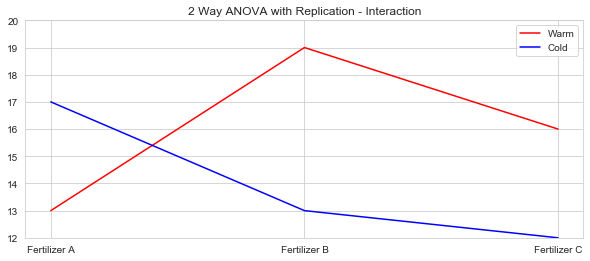

In [436]:
# Plot the interactions
plt.figure(figsize=(10,4))
warm = [mean_warm_A, mean_warm_B, mean_warm_C]
cold = [mean_cold_A, mean_cold_B, mean_cold_C]
fertilizer = ['Fertilizer A', 'Fertilizer B', 'Fertilizer C']

plt.plot(fertilizer ,warm, color='red', label='Warm')
plt.plot(cold, color='blue', label='Cold')

plt.ylim([12,20])
plt.legend()
plt.title("2 Way ANOVA with Replication - Interaction")
plt.show()

## Linear Regression
- The goal of regression is to develop an equation or formula that best describes the relationship between variables.

- Recall the equation of a line follows the form $y = mx + b$ where

$m$ is the slope (rise over run)

$b$ is where the line crosses the y-axis

In a linear regression, where we try to formulate the relationship between variables, $y = mx + b$ becomes:
$$\hat{y} = b_0 + b_1 x$$

Our goal is to predict the value of a dependent variable (y) based on that of an independent variable (x)

How to derive $b_1$ and $b_0$:

$$b_1 = Px,y \frac{\sigma_y}{\sigma_x}$$

$Px,y$ = Pearson Correlation Coefficient

$\sigma_x, \sigma_y$ = Standard Deviations

#### Limitations of Linear Regression
Always visualize the data as it may not look accurate and follow the shape

#### Example 1
- A manager wants to find out the relationshiop between the number of hours that a plant is operations in a week and weekly production
- The independent variable is x is hours, y = production

__Calculations__

$$\hat{y} = b_0 + b_1x$$

$$b_1 = \frac{\sum{(x_1-\bar{x})(y_i - \bar{y})}}{\sum{(x_i-\bar{x})^2}}$$

$$b_0 = \bar{y}-b_1\bar{x}$$

In [458]:
df = pd.DataFrame({'Production Hours (x)':[34,35,39,42,43,47],
                   'Production Volume (y)':[102,109,137,148,150,158]})
# Subtract means from data points
xbar = df['Production Hours (x)'].mean()
ybar = df['Production Volume (y)'].mean()

df["(x-xbar)"] = df['Production Hours (x)'] - xbar
df["(y-ybar)"] = df['Production Volume (y)'] - ybar

# Multiply together
df['(x-xbar)(y-ybar)'] = df["(x-xbar)"] * df["(y-ybar)"]

# Square it
df['(x-xbar)2'] = df["(x-xbar)"]**2

# Get sum of last items
sum_xy = df['(x-xbar)(y-ybar)'].sum()
sum_xy2 = df['(x-xbar)2'].sum()

print(sum_xy, sum_xy2)

# Now divide them
b1 = sum_xy/sum_xy2
b0 = ybar - (b1*xbar)
print(f"b0 = {b0}, b1 = {b1}")
print("\n")
print(f"Therefore the regression fit = yhat = {b0}+{b1}x")

558.0 124.0
b0 = -46.0, b1 = 4.5


Therefore the regression fit = yhat = -46.0+4.5x


Based on this formula the manager wants to produce 125 untis per week, the plant should run for:

$$\bar{y} = b_0+b_1x$$

$$125 = -46+4.5x$$

$$x = \frac{171}{4.5} = 38 HrsPerWeek$$

__Python__
```python
from scipy.stats import linregress
x = [34,35,39,42,43,47]
y = [102,109,137,148,150,158]

slope = round(linregress(x,y).slope, 1)
intercept = round(linregress(x,y).intercept, 1)

print(f"y = {intercept} + {slope}x")
y = -46 + 4.5x
```

## Multiple Regression
In real world this will be done electronically.
- in linear regression we have one independent valirable that may relate to a dependent variable with the formula
- Multiple regress lets us compare several independent variables to one dependent variable at the same time
- Each independent variable is assigned a subscript $x_1, x_2, x_3$

- The general formula is expanded

__linear regression__
$$\hat{y} = b_0 + b_1x$$

__multiple regression__
$$\hat{y} = b_0 + b_1x_1 + b_2x_2 +...$$

$b_1$ is the coefficient on $x_1$

$b_1$ reflects the change in $\hat{y}$ for a given change in $x_1$, all else remaining constant

The formulas for coefficients also expand.

#### Example 2
- For example, a used car lot may want to know what variables affect net profits
- They could create a list of predictors that might correlate with profit: age, brand
- They want to measure the correlation between each variable to net profit
- However, some predictors might correlate with each other: age, price
- The age of a car would have a direct impact on its sale price - Multicolinearity

```python
from sklearn.linear_model import LinearRegression

x1, x2 = [1,3,2,3,1],[8,4,9,6,3]
y = [29,31,36,35,19]
reg = LinearRegression()
reg.fit(list(zip(x1,x2)),y)
b1,b2 = reg.coef_[0], reg.coef_[1]
b0 = reg.intercept_
print(f"y = {b0:.3} + {b1:.3} + {b2:.23}x2")
y = 8.0 + 5.0x1 + 2.0x2
```

## Chi-Square Analysis
__Chi-Square Test__: The key concept is "goodness of fit".  Are the observed results straying too far away from the expected results.

The __Chi-square test__ (also written $x^2$) is used to determine the probability of an observed frequency of events given an expected frequency

- For example if we flip a coin 18 times and observe that it comes up heads 12 times, can we say that this is due to chance, or do we assume that our coin is biased?
- The chi-square formula consider the sum of square distances between observed value O and expected values E, divided by each expected value 

$$x^2 = \sum{\frac{(O-E)^2}{E}}$$

- For our coin example, we had heads come up 12 times out of 18 flips, with an expected frequency of 9 heads (half of 18)
- This means that tails came up 6 times, with an expected frequency of 9 tails.

- first group heads then tails

$$x^2 = \sum{\frac{(O-E)^2}{E}=\frac{(12-9)^2}{9}+\frac{(6-9)^2}{9}=2.0}$$

What does 2.0 represent?  We have to look at the chi-square distribution

Our coin example had a $x^2$ value of 2.0
- degrees of freedom was (2-1) or 1 - two outcomes minus 1
- our critical value with 95% confidence is: 3.841

```python
# Find the x2
x2 = chisquare(12,18)
x2 = x2.statistic
2.0

x_critical = chi2.ppf(0.95, 1)
3.841458820
```

- Our null hypothesis that 12 heads in 18 flips was statistically reasonable for a fair coin with 95% probability
- Since x2 = 2.0 and x_critical is 3.841 we fail to reject the null hypothesis so it is reasonable to get 12 heads in 18 flips

In [517]:
x = chisquare(f_obs=16, f_exp=9, ddof=1)
x

Power_divergenceResult(statistic=5.444444444444445, pvalue=nan)

#### Example 1
- A company runs six identical servers to suppport its IT infrastructure
- Logically, the failure rate should be the same across all servers
- Based on the following data can we assumed that the servers fail at the same rate?

First let's state some assumptions:
1. if a server fails, it does NOT affect the probability of that server failing again, or of other server failing
2. a server either fails or it doesn't there are no degrees of failure - discrete outcomes

__Excel__
=CHISQ.INV.RT(0.05,5)

In [522]:
# Chi-square
df = pd.DataFrame({'Server':['A', 'B', 'C', 'D', 'E', 'F'],
                   'Observed':[46,36,52,26,42,38]})

# 1. Add up the observations
sum_obs = df['Observed'].sum()
sum_obs

# 2. With an equal failure rate (inferred from the question) we expect each server to fail
df['Expected'] = sum_obs/df.shape[0]
df

,Server,Observed,Expected
0,A,46,40.0
1,B,36,40.0
2,C,52,40.0
3,D,26,40.0
4,E,42,40.0
5,F,38,40.0


Since we expect each server to have the same probability of failure, divide the number of observations by the number of servers to get an expected failure rate of 240 / 6 = 40 for each server

In [527]:
# 3. Consider the Chi-square formula

# subtract (O-E)
df['(O-E)'] = df['Observed'] - df['Expected']

# square (O-E)2
df['(O-E)2'] = df['(O-E)']**2

# divide (O-E)2/E
df['(O-E)2/E'] = df['(O-E)2']/df['Expected']

# Sum last column (x2)
x2 = df['(O-E)2/E'].sum()

print(f"x2 = {x2}")

# X Critical
n = df.shape[0]
ddof = n-1
x_critical = chi2.ppf(0.95, ddof)

print(f"x critical = {x_critical}")

df

x2 = 10.0
x critical = 11.070497693516351


,Server,Observed,Expected,(O-E),(O-E)2,(O-E)2/E
0,A,46,40.0,6.0,36.0,0.9
1,B,36,40.0,-4.0,16.0,0.4
2,C,52,40.0,12.0,144.0,3.6
3,D,26,40.0,-14.0,196.0,4.9
4,E,42,40.0,2.0,4.0,0.1
5,F,38,40.0,-2.0,4.0,0.1


- Since x2 < x critical, we fail to reject the null hypothesis.
- Even though server C failed twice as many times as server D, the results show that this can happen at least 5% of the time (p-value)